<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/Wheat_and_chess_board_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [2]:
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


#[Problem 1] Number of wheat on a 2 x 2 square chess board

In [3]:
print("Arrange wheat on a 2 x 2 square chess board (ndarray)：\n{}".format(small_board_ndarray.reshape(2,2)))

Arrange wheat on a 2 x 2 square chess board (ndarray)：
[[1 2]
 [4 8]]


#[Problem 2] Expansion to n × m mass

In [4]:
def arrange_wheat_nxm(n, m):
  board_list = [1]
  for _ in range(n*m - 1):
    board_list.append(2*board_list[-1])
  return np.array(board_list).reshape(n, m).astype(np.uint64)

##Result

In [5]:
wheat_list = arrange_wheat_nxm(8, 8)
print("Arrange wheat on a 8 x 8 board：\n{}".format(wheat_list))

Arrange wheat on a 8 x 8 board：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70

#[Problem 3] Total number of wheat

##Sum

In [6]:
print("Total wheat on a 8 x 8 chess board：\n{}".format(wheat_list.sum()))

Total wheat on a 8 x 8 chess board：
18446744073709551615


##Bar graph

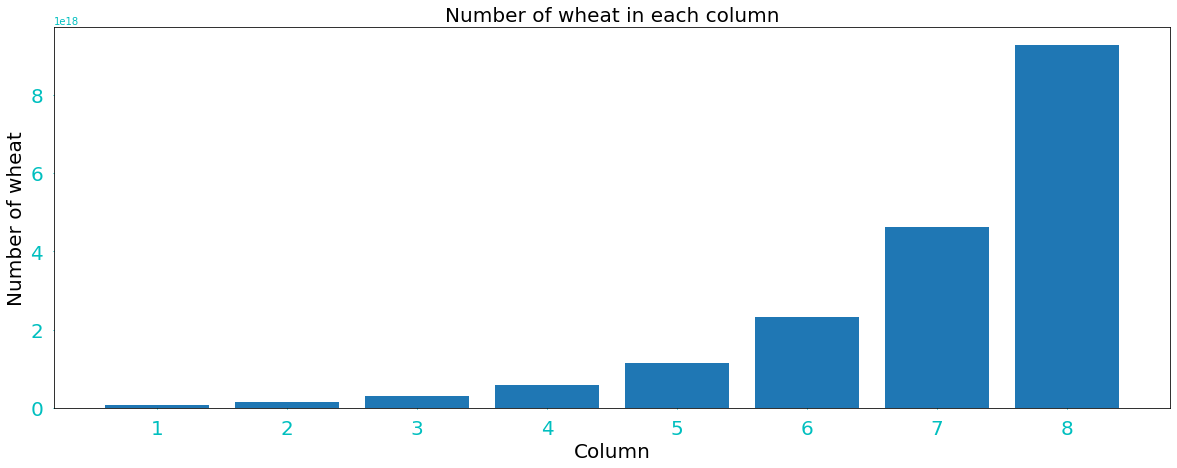

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

wheat_per_column = wheat_list.sum(axis = 0)
plt.figure(figsize=(20, 7))
plt.xlabel("Column", fontsize = 20)
plt.ylabel("Number of wheat", fontsize = 20)
plt.title("Number of wheat in each column", fontsize = 20)
plt.tick_params(direction = 'out', length = 1, width = 1, pad = 10, labelsize = 20, colors = 'c')
plt.bar(np.linspace(1, 8, 8), wheat_per_column)
plt.show()

#[Problem 4] Heat map of the number of wheat

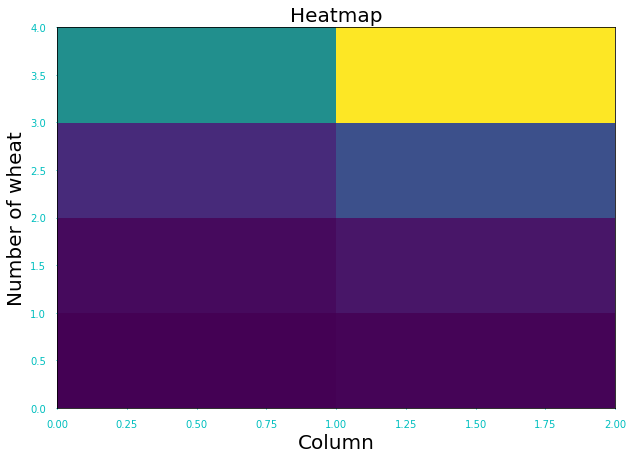

In [8]:
plt.figure(figsize=(10, 7))
plt.xlabel("Column", fontsize = 20)
plt.ylabel("Number of wheat", fontsize = 20)
plt.title("Heatmap", fontsize = 20)
plt.tick_params(direction = 'out', length = 1, width = 1, pad = 10, labelsize = 10, colors = 'c')
plt.pcolor(wheat_per_column.reshape(4, 2))
plt.show()

#[Problem 5] How many times is the second half as long as the first half?

In [9]:
wheat_per_half = [wheat_per_column[:4].sum(), wheat_per_column[4:8].sum()]
print("The number of wheat in the second half of the chessboard is {} times greater than in the first half".format(wheat_per_half[1]/wheat_per_half[0]))

The number of wheat in the second half of the chessboard is 16.0 times greater than in the first half


#[Problem 6] Expansion to n × m mass by another calculation method

##Using ```np.append()```

In [10]:
def arrange_wheat_nxm_append(n, m):
  small_board_ndarray = np.array([1])
  for _ in range(n*m - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1]).astype(np.uint64)
  return small_board_ndarray.reshape(n, m)

print("Arrange wheat on a plate of 8 x 8 squares Using np.append()：\n{}".format(arrange_wheat_nxm_append(8, 8)))

Arrange wheat on a plate of 8 x 8 squares Using np.append()：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416 

##Using broadcast

In [11]:
def arrange_wheat_nxm_broadcast(n, m):
  indices_of_squares = np.arange(n*m).astype(np.uint64)
  small_board_ndarray = 2**indices_of_squares
  return small_board_ndarray.reshape(n, m)

print("Arrange wheat on a plate of 8 x 8 squares Using broadcast：\n{}".format(arrange_wheat_nxm_broadcast(8, 8)))

Arrange wheat on a plate of 8 x 8 squares Using broadcast：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416   

#[Problem 7] Comparing calculation times

##Using Python lists and for statements

In [12]:
%%timeit
arrange_wheat_nxm(8, 8)

The slowest run took 4.22 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17.1 µs per loop


##Using ```np.append()```

In [13]:
%%timeit
arrange_wheat_nxm_append(8, 8)

1000 loops, best of 5: 648 µs per loop


##Using broadcast

In [14]:
%%timeit
arrange_wheat_nxm_broadcast(8, 8)

The slowest run took 16.18 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.67 µs per loop


##Conclusion


> According to the results from 3 differents methods above, it is cleared that the one using broadcast is the fastest while the one using ```np.append()``` is nearly 200 times slower.

